In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [91]:
df = pd.read_csv("data_set.csv")

features = [
    'close_odds_total_over',
    'close_odds_total_under',
    'close_odds_ah_1',
    'close_odds_ah_2',
    'close_line_ah_1',
    'close_line_ah_2'
]

target_home = 'corners_result_home_1st_ht'
target_away = 'corners_result_away_1st_ht'

X = df[features]
y_home = df[target_home]
y_away = df[target_away]

print(df[features].isna().sum()) 
print(f'target_home {df[target_home].isna().sum()}')
print(f'target_away {df[target_away].isna().sum()}')
df[features].describe()

close_odds_total_over     0
close_odds_total_under    0
close_odds_ah_1           0
close_odds_ah_2           0
close_line_ah_1           0
close_line_ah_2           0
dtype: int64
target_home 0
target_away 0


,close_odds_total_over,close_odds_total_under,close_odds_ah_1,close_odds_ah_2,close_line_ah_1,close_line_ah_2
count,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000
mean,1.914953,1.916924,1.916305,1.915305,-0.840784,0.840784
std,0.065407,0.066185,0.062467,0.062597,1.583548,1.583548
min,1.760000,1.740000,1.690000,1.670000,-6.500000,-5.000000
25%,1.860000,1.860000,1.860000,1.860000,-2.000000,0.000000
50%,1.920000,1.920000,1.920000,1.920000,-1.000000,1.000000
75%,1.970000,1.970000,1.970000,1.970000,0.000000,2.000000
max,2.070000,2.070000,2.120000,2.170000,5.000000,6.500000


In [92]:
# Train + val/test split
X_train, X_temp, y_home_train, y_home_temp, y_away_train, y_away_temp = train_test_split(
    X, y_home, y_away, test_size=0.3, random_state=42
)

# Validering + test split
X_val, X_test, y_home_val, y_home_test, y_away_val, y_away_test = train_test_split(
    X_temp, y_home_temp, y_away_temp, test_size=0.5, random_state=42
)

<h2>Training

In [93]:
lr_home = LinearRegression().fit(X_train, y_home_train)
lr_away = LinearRegression().fit(X_train, y_away_train)

In [94]:
rf_home = RandomForestRegressor(random_state=42).fit(X_train, y_home_train)
rf_away = RandomForestRegressor(random_state=42).fit(X_train, y_away_train)

In [95]:
gb_home = GradientBoostingRegressor(random_state=42).fit(X_train, y_home_train)
gb_away = GradientBoostingRegressor(random_state=42).fit(X_train, y_away_train)

<h2>Evaluation</h2>

In [96]:
def evaluate(model, X, y_true):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    print(f"{model} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    return mae, rmse

print("Home team:")
evaluate(lr_home, X_val, y_home_val)
evaluate(rf_home, X_val, y_home_val)
evaluate(gb_home, X_val, y_home_val)

print("\nAway team:")
evaluate(lr_away, X_val, y_away_val)
evaluate(rf_away, X_val, y_away_val)
evaluate(gb_away, X_val, y_away_val)

model_home = lr_home
model_away = lr_away


Home team:
LinearRegression() - MAE: 1.41, RMSE: 1.81
RandomForestRegressor(random_state=42) - MAE: 1.51, RMSE: 1.95
GradientBoostingRegressor(random_state=42) - MAE: 1.43, RMSE: 1.84

Away team:
LinearRegression() - MAE: 1.20, RMSE: 1.54
RandomForestRegressor(random_state=42) - MAE: 1.25, RMSE: 1.61
GradientBoostingRegressor(random_state=42) - MAE: 1.22, RMSE: 1.55


<h2>Train

In [97]:
y_home_pred = model_home.predict(X_test)
y_away_pred = model_away.predict(X_test)

<h2>Analysis

Home team – Test MAE: 1.38, RMSE: 1.74
Away team – Test MAE: 1.25, RMSE: 1.59

Home team coeff:
close_odds_total_over    -0.653449
close_odds_total_under   -0.410997
close_line_ah_1          -0.146358
close_line_ah_2           0.146358
close_odds_ah_1           2.909361
close_odds_ah_2           3.067045
dtype: float64
Away team coeff:
close_odds_ah_2          -8.789192
close_odds_ah_1          -8.676782
close_line_ah_2          -0.125213
close_line_ah_1           0.125213
close_odds_total_over     7.038844
close_odds_total_under    7.192059
dtype: float64


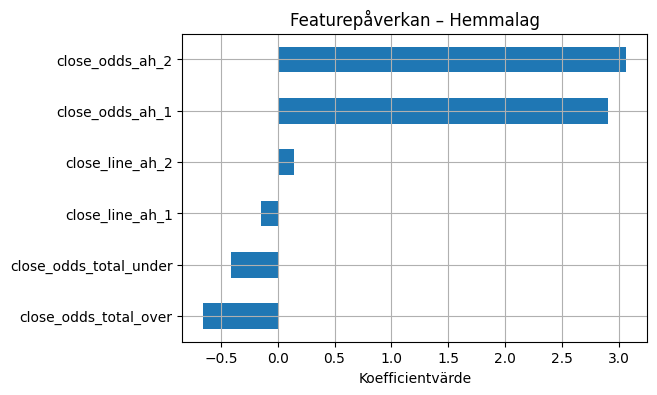

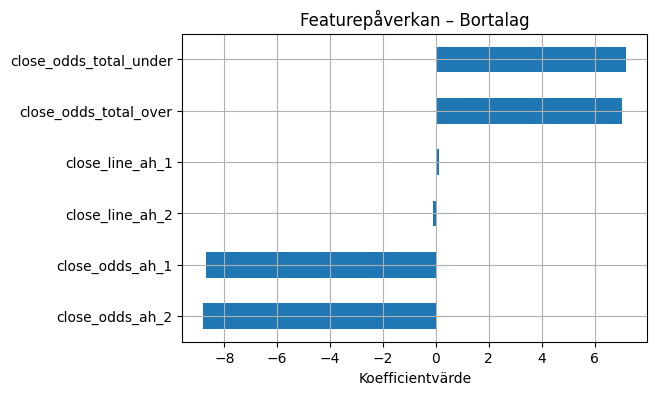

In [ ]:
mae_home = mean_absolute_error(y_home_test, y_home_pred)
rmse_home = root_mean_squared_error(y_home_test, y_home_pred)
print(f"Home team – Test MAE: {mae_home:.2f}, RMSE: {rmse_home:.2f}")

mae_away = mean_absolute_error(y_away_test, y_away_pred)
rmse_away = root_mean_squared_error(y_away_test, y_away_pred)
print(f"Away team – Test MAE: {mae_away:.2f}, RMSE: {rmse_away:.2f}")

coeff_home = pd.Series(model_home.coef_, index=features).sort_values()
coeff_away = pd.Series(model_away.coef_, index=features).sort_values()
print(f'\nHome team coeff:\n{coeff_home}')
print(f'Away team coeff:\n{coeff_away}')